# Regression

CREDIT: This practical was inspired from [this notebook on regression](https://www.kaggle.com/code/caesarmario/ww2-temperatures-w-linear-regression/notebook).

## Setup
### Imports

In [2]:
import string

import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time                                             # for execution time measurement
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Loading the dataset

Today's dataset is the [Weather Conditions in World War Two](https://www.kaggle.com/datasets/smid80/weatherww2) dataset.

In [3]:
df = pd.read_csv("Summary of Weather.csv")

<ipython-input-3-ce9a816bd962>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv")


## Observing the dataset

Using what you have learned in the previous lessons, examine the dataset and see what you can learn about it. In the cells underneath, write any information that seems relevant to you. Focus in particular on the understanding of what the dataset and its columns contain.

In today's practical, we will try to predict the value of `MaxTemp`. Which feature(s) seem more adapted to perform this task, and why?

In [ ]:
# Your code here

*[Your comments here]*

In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(119040, 31)

In [4]:
df.describe ()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

<ipython-input-6-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

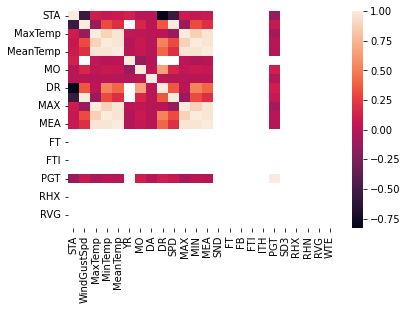

In [6]:
sns.heatmap(df.corr())

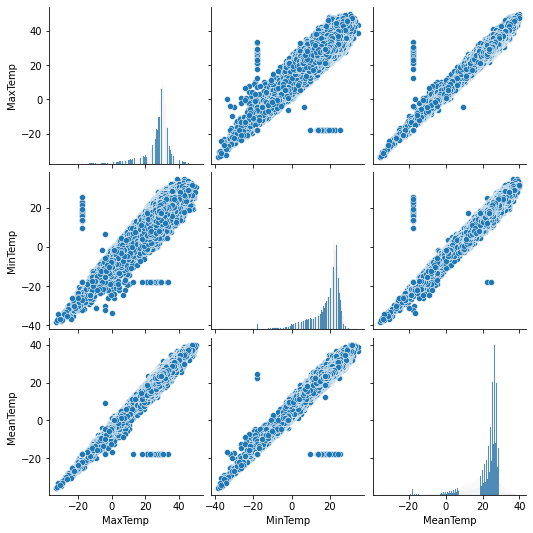

In [7]:
sns.pairplot(df[["MaxTemp", 'MinTemp', "MeanTemp"]])

## Preparing the data

We will be performing regression on the `MaxTemp` feature, using the `MinTemp` feature only.
In the following cell:
1. Define the input (X) and output (y) of the regression.
2. Using `scikit-learn`'s `train_test_split` function, separate X and y into training and test sets. Make it so that 80% of the data is used for training, and 20% for testing. 
3. Why do we typically want to maximise the data used for training?

*[Your comments here]*

In [4]:
X = df["MinTemp"]

In [5]:
y = df["MaxTemp"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

In [7]:
print (X_train.shape, X_test.shape)

(95232,) (23808,)


## Performing regression

1. Using the observations you made above, justify which regression model is best fit for this task.
2. Using `scikit-learn`, train this regression model on the training set.
3. Give the formula of the regression model.
4. Display the regression model on a graph along with your test set. Comment on what you see.

*[Your comments here]*

In [8]:
X = df["MinTemp"]
y = df["MaxTemp"]
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
y_pred = model.predict(np.array(X_test).reshape(-1,1))

In [ ]:
np.abs(y_test-y_pred)

In [37]:
# Obtenir la pente (coefficient) et l'ordonnée à l'origine
slope = model.coef_[0]
intercept = model.intercept_

# Créer des points pour tracer la droite
x_values = np.linspace(min(X_train), max(X_train))
y_values = intercept + slope * x_values

# Tracer la droite de régression
plt.scatter(X_train, y_train, color='blue', label='Données d\'entraînement')
plt.plot(x_values, y_values, color='red', label='Régression linéaire')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

ValueError: ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Evaluating the model

Let us consider three metrics: MAE, MSE, RMSE. For each of these, answer the following questions:
1. What does the acronym mean?
2. What does the metric measure?
3. What are the pros and cons compared to the other two metrics?
4. Using their implementation in `scikit-learn`, measure the performance of your regression model.

After measuring all three metrics, interpret your results.

*[Your comments here]*

In [11]:
metrics.mean_squared_error(y_test,y_pred)

17.754443450590202

In [12]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.213602194155281

## Bonus questions
1. Try training a model to predict the value of `MaxTemp` using more features. Evaluate this new model and compare the results. How are the metrics impacted? How do you interpret this?
2. Try fitting a different regression model to the data. Observe and analyze the new results.

*[Your comments here]*

In [13]:
X = df[["MinTemp","MeanTemp"]].to_numpy()
X

array([[22.22222222, 23.88888889],
 [21.66666667, 25.55555556],
 [22.22222222, 24.44444444],
 ...,
 [18.33333333, 23.33333333],
 [18.33333333, 23.33333333],
 [17.22222222, 23.33333333]])

In [15]:
y = df["MaxTemp"]
y

0 25.555556
1 28.888889
2 26.111111
3 26.666667
4 26.666667
 ... 
119035 28.333333
119036 29.444444
119037 28.333333
119038 28.333333
119039 29.444444
Name: MaxTemp, Length: 119040, dtype: float64

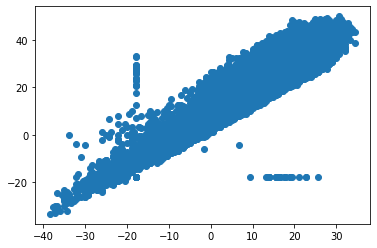

In [23]:
plt.scatter(X,y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

In [17]:
print (X_train.shape, X_test.shape)

(95232, 2) (23808, 2)


In [18]:
X = df["MinTemp"]
y = df["MaxTemp"]
model = LinearRegression()
model.fit(np.array(X_train), np.array(y_train).reshape(-1,1))
y_pred = model.predict(np.array(X_test))

In [19]:
metrics.mean_squared_error(y_test,y_pred)

1.0179481039155613

In [20]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.0089341425066165

ValueError: ValueError: x and y must be the same size

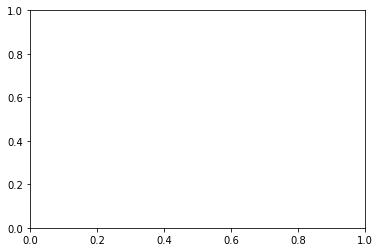

In [32]:
# Obtenir la pente (coefficient) et l'ordonnée à l'origine
slope = model.coef_[0]
intercept = model.intercept_

# Créer des points pour tracer la droite
x_values = np.linspace(np.min(X_train), np.max(X_train)).reshape(-1,1)
y_values = (intercept + slope * x_values).reshape()

# Tracer la droite de régression
plt.scatter(X_train, y_train, color='blue', label='Données d\'entraînement')
plt.plot(x_values, y_values, color='red', label='Régression linéaire')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()